SqueezeNet

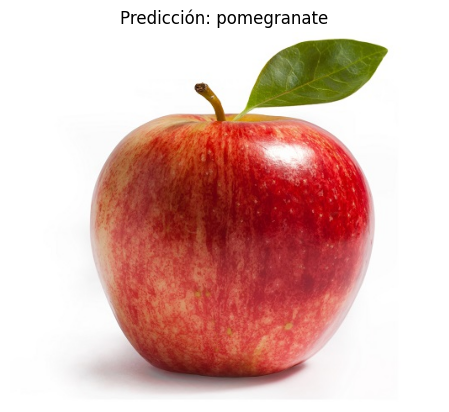

In [ ]:
import torch
from torchvision import models, transforms
from PIL import Image
import requests
import json
import matplotlib.pyplot as plt

# Cargar las etiquetas de ImageNet
LABELS_URL = 'https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json'
response = requests.get(LABELS_URL)
labels = json.loads(response.text)

# Cargar el modelo SqueezeNet preentrenado en ImageNet (puedes hacer lo mismo con GoogLeNet)
model = models.squeezenet1_0(pretrained=True)
model.eval()

# Transformaciones para la imagen de entrada
transform = transforms.Compose([
    transforms.Resize(256), # Redimensiona la imagen para que tenga un tamaño de 256 píxeles en el lado más corto.
    transforms.CenterCrop(224), # Recorta la imagen en el centro, obteniendo una región de 224x224 píxeles.
    transforms.ToTensor(), # Convierte la imagen en un tensor de PyTorch
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), # Normaliza los valores de los píxeles para que se ajusten a los requisitos del modelo preentrenado.
                                                                                 # La normalización se realiza restando la media y dividiendo por la desviación estándar para cada canal de color (RGB).
])

# Cargar la imagen (cambia el nombre de archivo según la imagen que tengas)
img = Image.open('Image_38.jpg')
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0) # Añade una dimensión extra al tensor

# Realizar la inferencia
with torch.no_grad():
    out = model(batch_t)

# Obtener la predicción más probable
_, pred = torch.max(out, 1)

# Mostrar la imagen y la predicción usando Matplotlib
plt.imshow(img)
plt.title(f'Predicción: {labels[pred.item()]}')
plt.axis('off')  # Ocultar los ejes
plt.show()


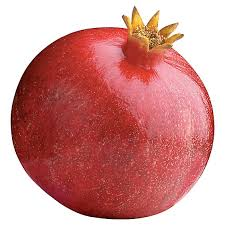

GoogLeNet

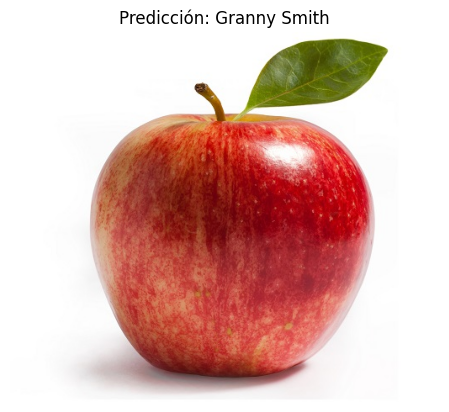

In [ ]:
import torch
from torchvision import models, transforms
from PIL import Image
import requests
import json
import matplotlib.pyplot as plt

# Cargar las etiquetas de ImageNet
LABELS_URL = 'https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json'
response = requests.get(LABELS_URL)
labels = json.loads(response.text)

# Cargar el modelo GoogLeNet preentrenado en ImageNet
model = models.googlenet(pretrained=True)
model.eval()

# Transformaciones para la imagen de entrada
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Cargar la imagen (cambia el nombre de archivo según la imagen que tengas)
img = Image.open('Image_38.jpg')
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0)

# Realizar la inferencia
with torch.no_grad():
    out = model(batch_t)

# Obtener la predicción más probable
_, pred = torch.max(out, 1)

# Mostrar la imagen y la predicción usando Matplotlib
plt.imshow(img)
plt.title(f'Predicción: {labels[pred.item()]}')
plt.axis('off')  # Ocultar los ejes
plt.show()


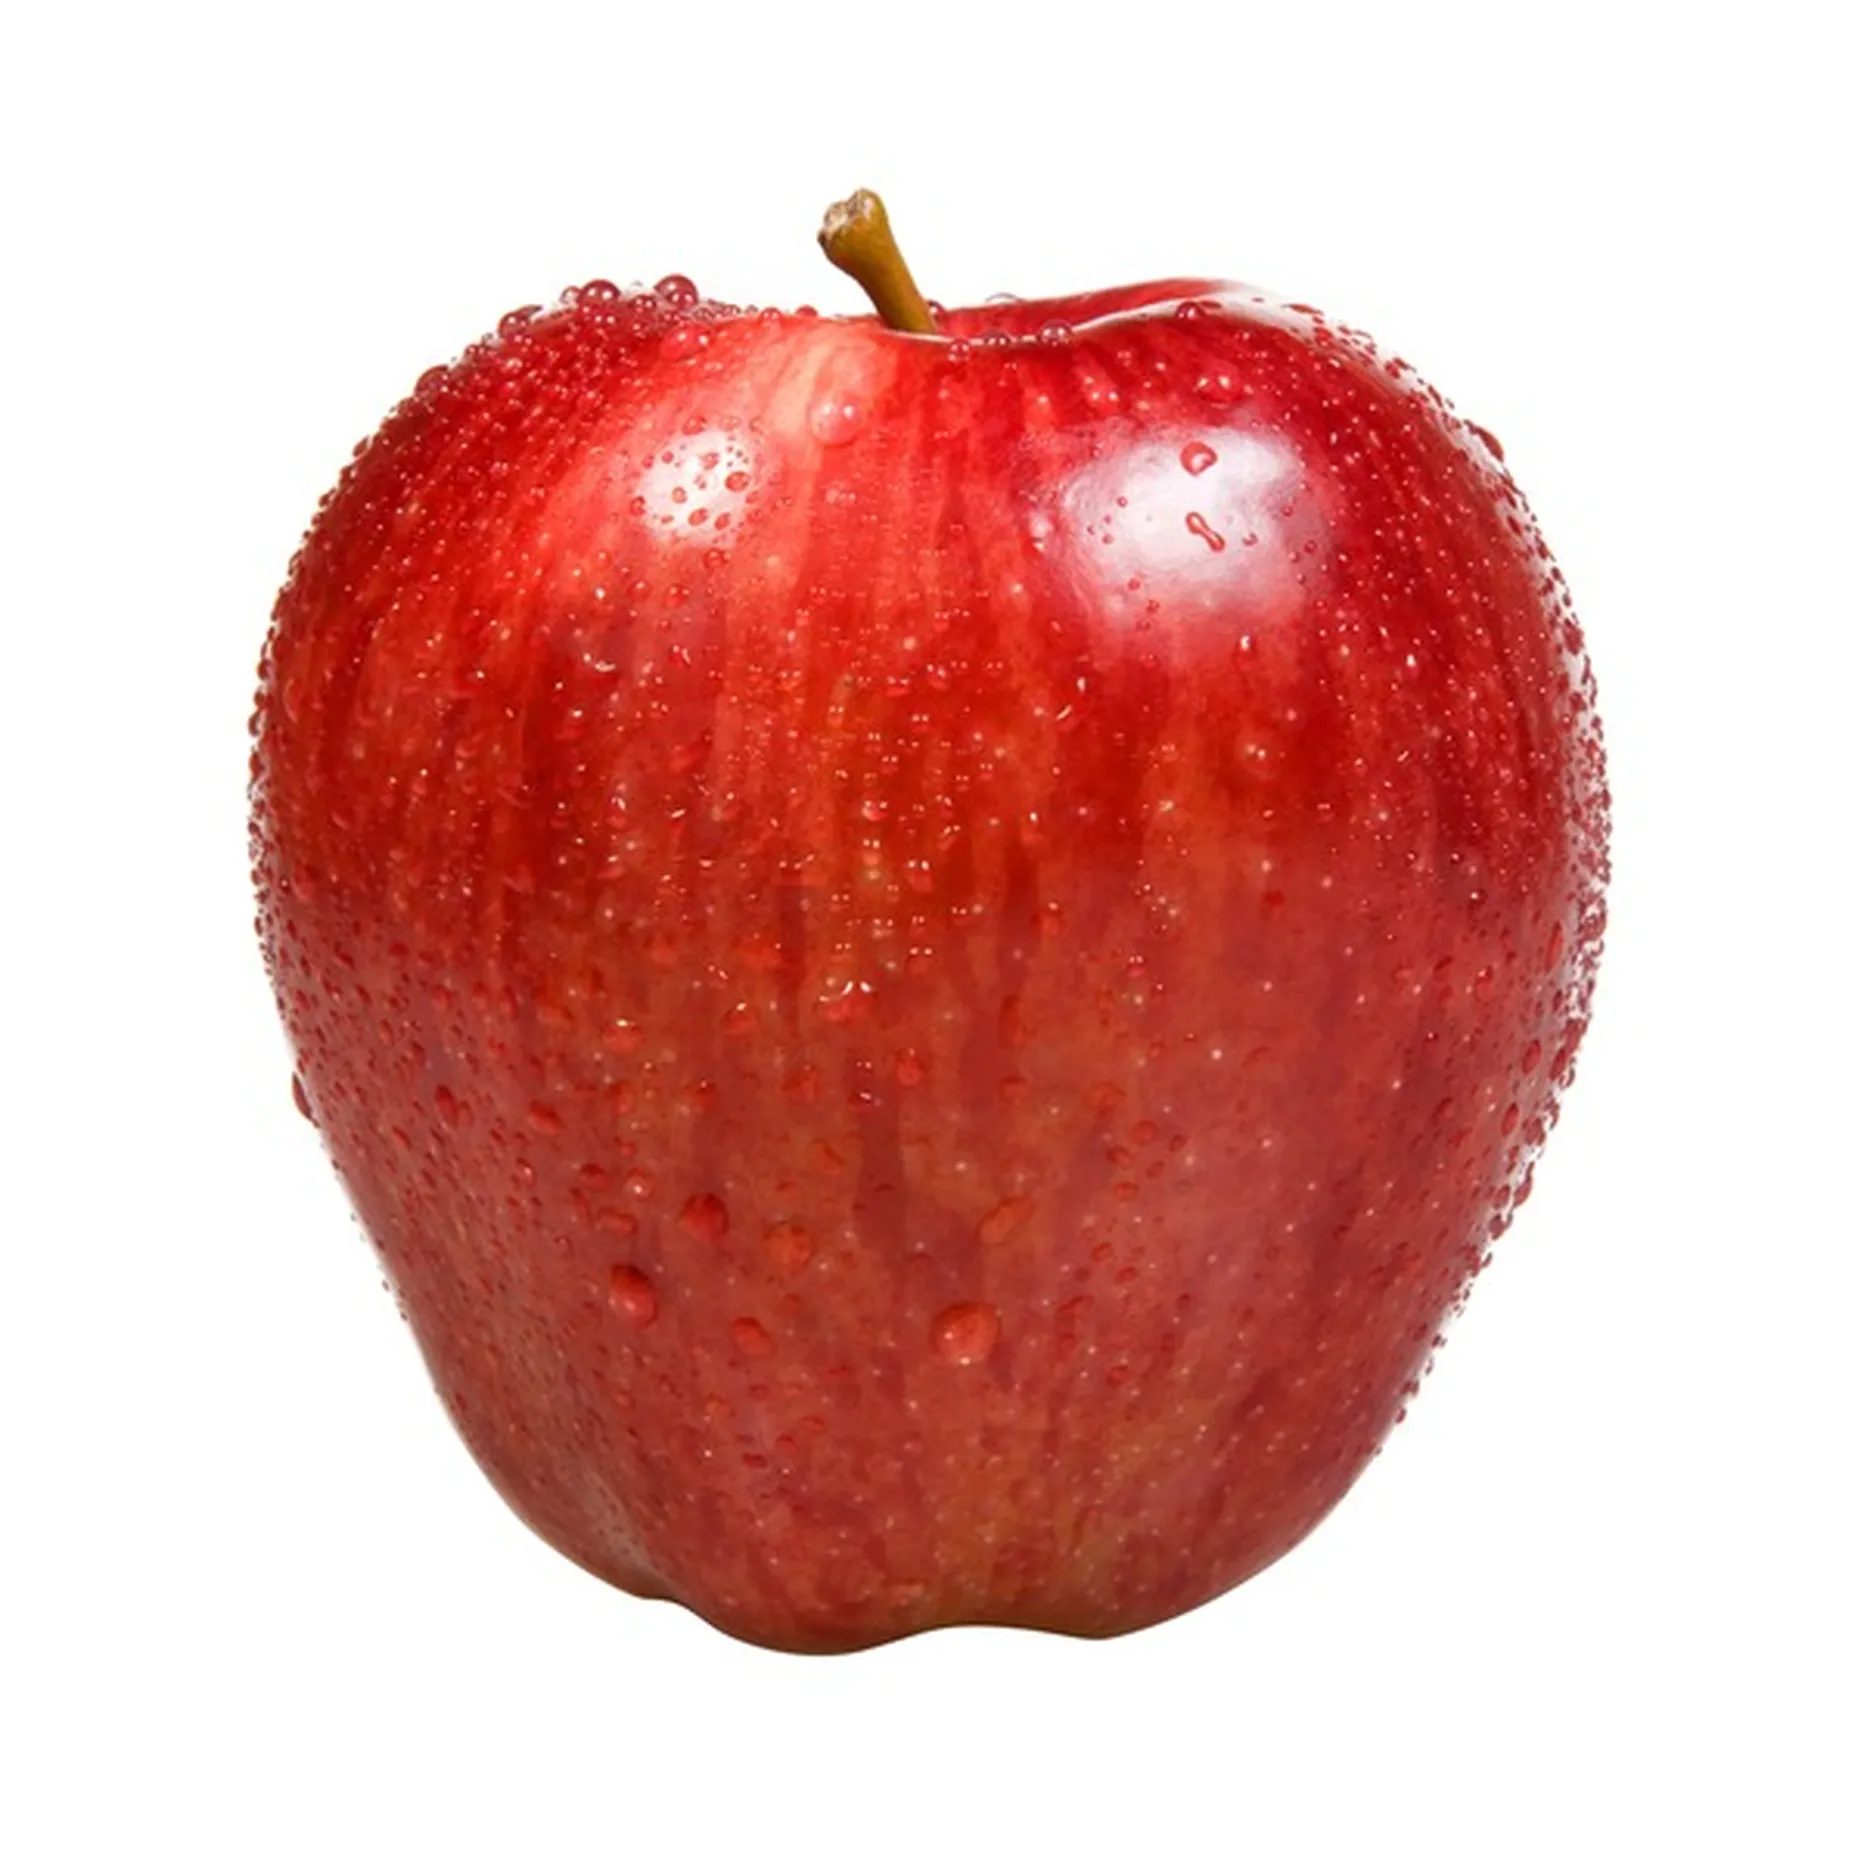